## Import libraries

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


Load dataset (this file and the dataset are in the same directory)

## Data Preprocessing

In [3]:
data = pd.read_csv("./heart.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

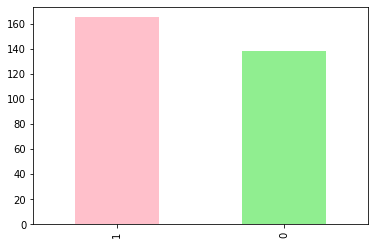

In [7]:
data.target.value_counts()
data.target.value_counts().plot(kind="bar", color=["pink", "lightgreen"])
plt.savefig('target', dpi=300)

In [8]:
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

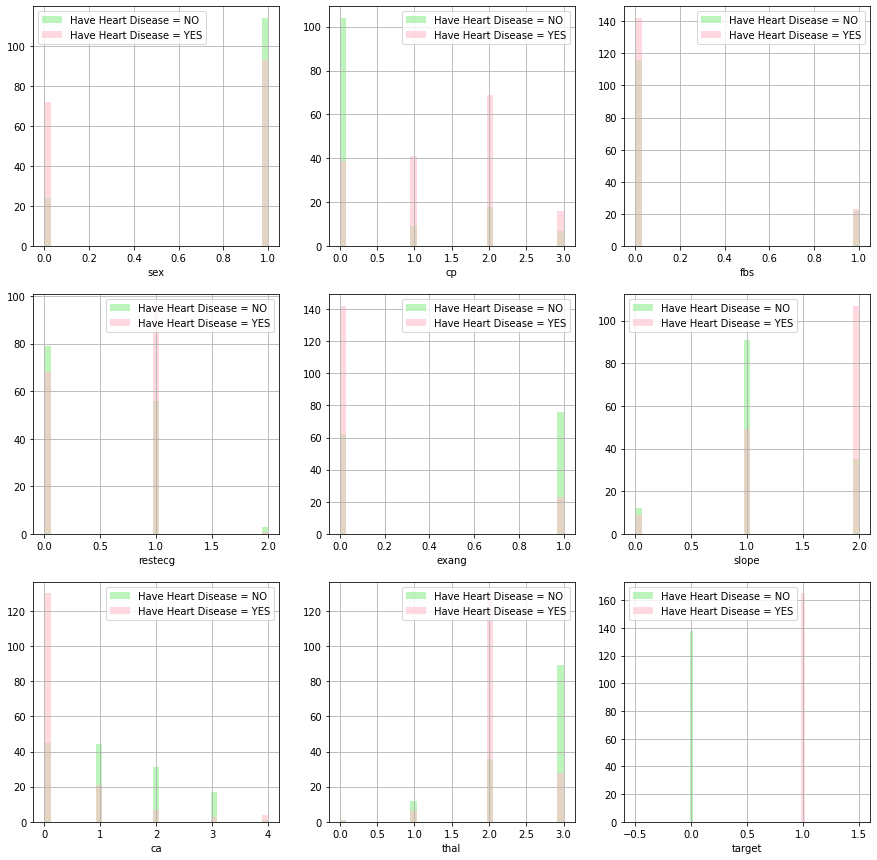

In [9]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 0][column].hist(bins=35, color='lightgreen', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='pink', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)
    plt.savefig('category', dpi=300)

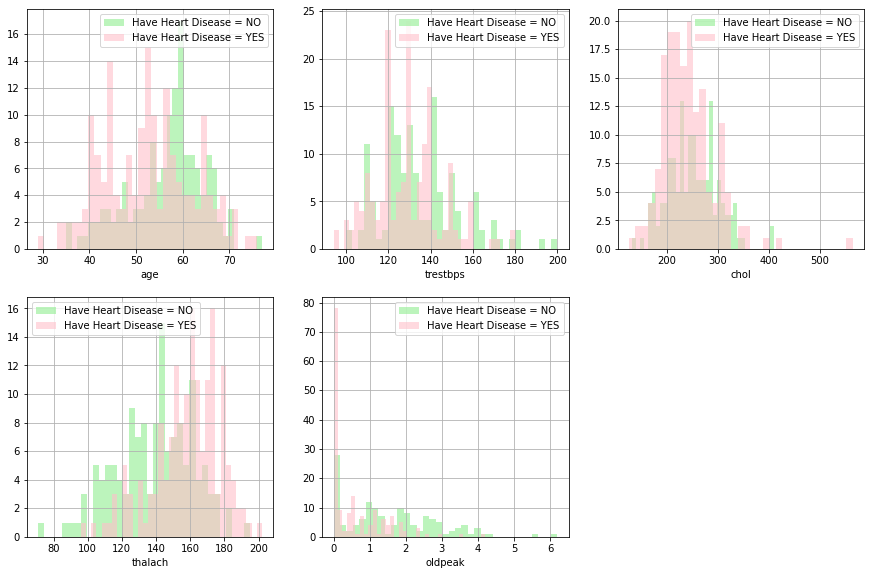

In [10]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 0][column].hist(bins=35, color='lightgreen', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='pink', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)
    plt.savefig('continous', dpi=300)

### Preprocessing for Machine Learning Models

This dataset contains 165 positive samples (with heart disease) and 138 negative

In [11]:
scaler = StandardScaler()
col2scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[col2scale] = scaler.fit_transform(data[col2scale])

In [12]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [13]:
X = data.drop(['target'], axis=1)
y = data['target']

Split the dataset into training and testing (80/20)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

In [15]:
print("number of training samples: ", X_train.shape[0])
print("number of features: ", X_train.shape[1])

number of training samples:  242
number of features:  13


### Preprocessing for Neural Networks

In [16]:
Xnn = np.array(data.drop(['target'], 1))
ynn = np.array(data['target'])

# Z-score normalization
mean = Xnn.mean(axis=0)
Xnn -= mean
std = Xnn.std(axis=0)
Xnn /= std

# Split the dataset into training and testing (80/20)
X_trainnn, X_testnn, y_trainnn, y_testnn = train_test_split(Xnn, ynn, random_state=42, test_size = 0.2)

# convert to categorical labels
Y_trainnn = to_categorical(y_trainnn, num_classes=None)
Y_testnn = to_categorical(y_testnn, num_classes=None)

## Model - Machine Learning Models

In [29]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n")
        print(f"Accuracy: {accuracy_score(y_train, pred) * 100:.2f}%")
        print(f"Precision: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"Recall: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"F1-score: {f1_score(y_train, pred) * 100:.2f}%")
        print(f"Confusion Matrix: \n{confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n")        
        print(f"Accuracy: {accuracy_score(y_test, pred) * 100:.2f}%")
        print(f"Precision: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"Recall: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"F1-score: {f1_score(y_test, pred) * 100:.2f}%")
        print(f"Confusion Matrix: \n{confusion_matrix(y_test, pred)}\n")
        sns.heatmap(confusion_matrix(y_test, pred),annot=True,cmap="Blues")
        plt.title("Confusion Matrix")
        plt.xlabel('Predicted labels') 
        plt.ylabel('True labels')
        plt.savefig('confusion_matrix', dpi=300)
        plt.show()

### Logistic Regression

Train Result:

Accuracy: 86.36%
Precision: 85.71%
Recall: 90.23%
F1-score: 87.91%
Confusion Matrix: 
[[ 89  20]
 [ 13 120]]

Test Result:

Accuracy: 85.25%
Precision: 87.10%
Recall: 84.38%
F1-score: 85.71%
Confusion Matrix: 
[[25  4]
 [ 5 27]]



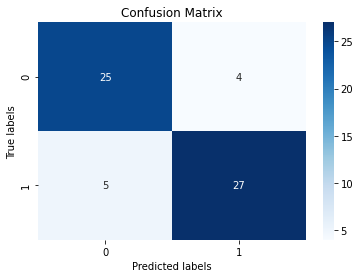

In [32]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

print_score(log_reg, X_train, y_train, X_test, y_test, train=True)
print_score(log_reg, X_train, y_train, X_test, y_test, train=False)

### K-Nearest Neighbors

Train Result:

Accuracy: 88.02%
Precision: 86.11%
Recall: 93.23%
F1-score: 89.53%
Confusion Matrix: 
[[ 89  20]
 [  9 124]]

Test Result:

Accuracy: 86.89%
Precision: 85.29%
Recall: 90.62%
F1-score: 87.88%
Confusion Matrix: 
[[24  5]
 [ 3 29]]



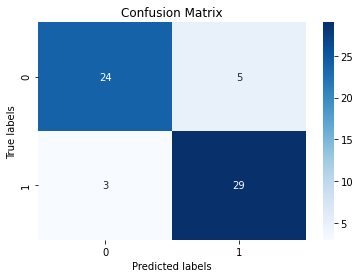

In [33]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

print_score(knn_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(knn_classifier, X_train, y_train, X_test, y_test, train=False)

### Support Vector Machine

Train Result:

Accuracy: 90.08%
Precision: 87.59%
Recall: 95.49%
F1-score: 91.37%
Confusion Matrix: 
[[ 91  18]
 [  6 127]]

Test Result:

Accuracy: 86.89%
Precision: 85.29%
Recall: 90.62%
F1-score: 87.88%
Confusion Matrix: 
[[24  5]
 [ 3 29]]



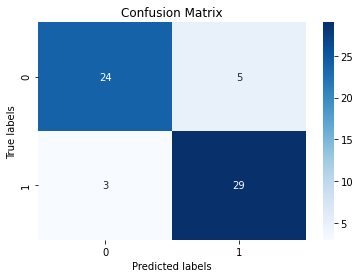

In [34]:
svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_model.fit(X_train, y_train)

print_score(svm_model, X_train, y_train, X_test, y_test, train=True)
print_score(svm_model, X_train, y_train, X_test, y_test, train=False)

### Decision Tree

Train Result:

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1-score: 100.00%
Confusion Matrix: 
[[109   0]
 [  0 133]]

Test Result:

Accuracy: 75.41%
Precision: 84.00%
Recall: 65.62%
F1-score: 73.68%
Confusion Matrix: 
[[25  4]
 [11 21]]



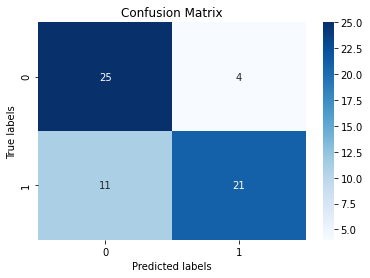

In [35]:
D_tree = DecisionTreeClassifier(random_state=42)
D_tree.fit(X_train, y_train)

print_score(D_tree, X_train, y_train, X_test, y_test, train=True)
print_score(D_tree, X_train, y_train, X_test, y_test, train=False)

### Random Forest

Train Result:

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1-score: 100.00%
Confusion Matrix: 
[[109   0]
 [  0 133]]

Test Result:

Accuracy: 83.61%
Precision: 84.38%
Recall: 84.38%
F1-score: 84.38%
Confusion Matrix: 
[[24  5]
 [ 5 27]]



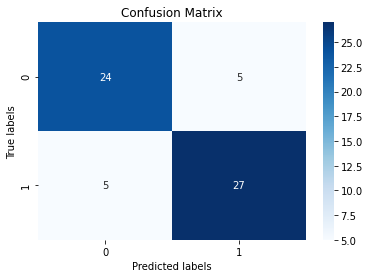

In [36]:
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)
rand_forest.fit(X_train, y_train)

print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

## Model - Neural networks

In [19]:
def nn_model():
    model = Sequential()
    model.add(Dense(16, input_dim=13, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    return model

In [20]:
model = nn_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                224       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(X_trainnn, Y_trainnn, validation_data=(X_testnn, Y_testnn), epochs=25, batch_size=10)

Train on 242 samples, validate on 61 samples
Epoch 1/25
242/242 [==============================] - 2s 10ms/step - loss: 1.2302 - accuracy: 0.5455 - val_loss: 0.9875 - val_accuracy: 0.5410
Epoch 2/25
242/242 [==============================] - 0s 959us/step - loss: 0.9689 - accuracy: 0.5413 - val_loss: 0.7990 - val_accuracy: 0.5574
Epoch 3/25
242/242 [==============================] - 0s 696us/step - loss: 0.8077 - accuracy: 0.5661 - val_loss: 0.6650 - val_accuracy: 0.6721
Epoch 4/25
242/242 [==============================] - 0s 703us/step - loss: 0.7575 - accuracy: 0.5868 - val_loss: 0.5886 - val_accuracy: 0.7377
Epoch 5/25
242/242 [==============================] - 0s 666us/step - loss: 0.6818 - accuracy: 0.6033 - val_loss: 0.5392 - val_accuracy: 0.7869
Epoch 6/25
242/242 [==============================] - 0s 673us/step - loss: 0.6390 - accuracy: 0.6942 - val_loss: 0.5046 - val_accuracy: 0.8197
Epoch 7/25
242/242 [==============================] - 0s 554us/step - loss: 0.6130 - accurac

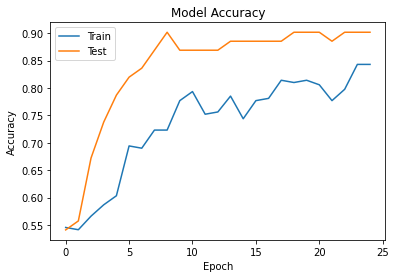

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.savefig("acc", dpi=300)
plt.show()

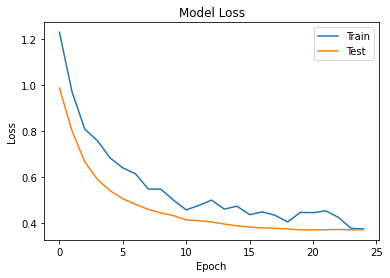

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.savefig("loss", dpi=300)
plt.show()

In [24]:
nn_pred = np.round(model.predict(X_testnn)).astype(int)
print(f"Test Accuracy: {accuracy_score(Y_testnn, nn_pred) * 100:.2f}%")
print(classification_report(Y_testnn, nn_pred))

Test Accuracy: 90.16%
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

   micro avg       0.90      0.90      0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61
 samples avg       0.90      0.90      0.90        61

